# ISEL - CPS 
## Semestre 2020/21
# <br>
###  <center> Trabalho Prático </center>
# </br>

Trabalho realizado por:
* Aurizando Silva, <b> 47461 </b>
* Diana Silva, numero <b> 46308 </b>

data: 04/12/2020

A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

Este trabalho foca os blocos Deteção e Correção de erros.

Considere as funções já criadas em Python das aulas anteriores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Quantific(R,Vmax,Qtype):
    # resposta
    L = 2 ** R
    delta = (2 * Vmax)/L
    delta_metade = delta / 2
    pos = (L-1)*delta_metade
  
    if(Qtype == "midtread"): # midtread
        Vq = np.arange(-pos, pos+delta, delta)
        Iq = np.arange(-Vmax, Vmax+delta, delta)
        
        for i in range(len(Vq)):
            Vq[i] = Vq[i] + delta_metade
            
        for i in range(len(Iq)):
            
            if(Iq[i] == Vmax):
                Iq[i] = Iq[i]
            else:
                Iq[i] = Iq[i]+delta_metade
        
    if (Qtype == "midrise"):
        Vq = np.arange(-pos, pos + delta,delta)
        Iq = np.arange(-Vmax  ,Vmax + delta ,delta)
    return Vq, Iq


def Quantificador(x,Vq,Iq):
    pos = np.digitize(x,Iq)
    resultado = Vq[pos-1]          
    return resultado

In [3]:
def Codific(arr_signal_quantized,R):
    
    representation = []
    arr_signal_quantized = np.int_(arr_signal_quantized)
            
    for i in range(len(arr_signal_quantized)):
        if(arr_signal_quantized[i] < 0):
            valor_int = arr_signal_quantized[i] * -1
        else:
            valor_int = arr_signal_quantized[i]
            
        binary = bin(valor_int).replace("0b", "")
        representation.append(binary)

    arr_binary = []
    for y in range (len(representation)):
        binary_to_int = int(representation[y])

        for z in range (R):
            arr_binary.append(binary_to_int//pow(10,R-z - 1)%10)
                
    return arr_binary


def Descodific(arr_binary,R):
    #resposta
    
    arr_signal_aux = []
        
    if (arr_binary.ndim == 2):
        
        for y in range(len(arr_binary)):
            array = []
            for z in range(len(int (arr_binary[y]))):
                int_aux = int(arr_binary[y][z], 2)
                array.append(int_aux) 
            arr_signal_aux.append(array)
                        
    else:
        
        for i in range(len(arr_binary)):
            int_aux = int(arr_binary[i], 2)
            arr_signal_aux.append(int_aux)    
        
    arr_signal = np.array(arr_signal_aux)

    return arr_signal 

In [4]:
def Hamming_7_4(arr_bits):
    
    for i in range(0, 5):
        if ((len(arr_bits) % 4) != 0):
            arr_bits.pop()
            
    resultado = [0] * (int(len(arr_bits) * 7 / 4))    
    
    pos = 0
    pos_final = 0
    
    for i in range(int(len(arr_bits) / 4)):
       
        m1 = arr_bits[pos]
        m2 = arr_bits[pos + 1]
        m3 = arr_bits[pos + 2]
        m4 = arr_bits[pos + 3]
        array_aux = []
        
        '''print("m1 {}".format(m1))

        print("m2 {}".format(m2))

        print("m3 {}".format(m3))
        
        print("m4 {}".format(m4))'''

        x1 = np.bitwise_xor(np.bitwise_xor(m1, m3), m4)
        x2 = np.bitwise_xor(np.bitwise_xor(m1, m2), m4)
        x3 = np.bitwise_xor(np.bitwise_xor(m1, m2), m3)

        array_aux = [m1,m2,m3,x3,m4,x2,x1]
        
        for j in range(7):
            resultado[pos_final+ j] = array_aux[j]
            
        pos = pos + 4
        
        pos_final = pos_final + 7
        
    return resultado


def Detetor(arr_binary):
          
    resultado = [0] * (int(len(arr_binary) / 7 * 4))
        
    pos = 0
    pos_aux = 0
    
    for i in range(int(len(arr_binary) / 7)):
        
        m4 = arr_binary[pos + 4]
        m3 = arr_binary[pos + 2]
        m2 = arr_binary[pos + 1]
        x3 = arr_binary[pos + 3]
        m1 = arr_binary[pos]
        x2 = arr_binary[pos + 5]
        x1 = arr_binary[pos + 6]
        p1 = np.bitwise_xor(np.bitwise_xor(m1, m3), m4)
        p2 = np.bitwise_xor(np.bitwise_xor(m1, m2), m4)
        p3 = np.bitwise_xor(np.bitwise_xor(m1, m2), m3)
        b1 = str((x1 + p1) % 2)
        b2 = str((x2 + p2) % 2)
        b3 = str((x3 + p3) % 2) 
        array_aux = []

        
        if( b1 == b2 == b3):  

            array_aux = [m1,m2,m3,m4]
        else: 

            array_aux = [m1,m2,m3,x3,m4,x2,x1]
            erro = b3 + b2 + b1
            pos_erro = 7 - int(erro, 2) 
                        
            if(array_aux[pos_erro]==1):
                
                array_aux[pos_erro] = 0
            elif(array_aux[pos_erro] == 0):
                array_aux[pos_erro] = 1
                
            array_aux = [array_aux[0],array_aux[1],array_aux[2],array_aux[4]]
            
        for i in range(4):
            resultado[pos_aux] = array_aux[i]
            pos_aux = pos_aux + 1
        pos = pos + 7
        
    return resultado

In [5]:
def Measure_SNRt(R, Vmax, signal):
    #potência do sinal
    P = sum(signal**2.0)/len(signal)
    return 6.02 * R + (10 * np.log10((3 * P) / (Vmax**2.0)))

def Measure_SNRp(x,y):
    #print(x)
    
    ruido = x - y
    Psinal = sum((x ** 2))
    Pruido = sum((ruido ** 2))
    SNRp = 10 * np.log10(Psinal/Pruido)  
    if (SNRp < 0):
        SNRp = SNRp*-1
    return SNRp

In [6]:
def BER_pratico(arr_bin_tx, arr_bin_rx):
    # resposta
    num_erros = 0
    for i in range(len(arr_bin_rx)):
        if(arr_bin_tx[i] != arr_bin_rx[i]):
            num_erros += 1;
            
    return num_erros / (len(arr_bin_rx))

#exemplo tirado de exercicio da sebenta
x = [0, 1, 1, 0, 0, 0, 1]
y = [0, 0, 1, 0, 1, 0, 1]

BER_pratico(x,y)

0.2857142857142857

Com as duas funções realizadas na aula anterior e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão $y=1*np.logical\_xor(x,np.random.binomial(1, BER_t,len(x)))$, onde $BER_t$ contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de $BER_t$.


In [7]:
#Resposta:
Fs = 48000
#Período
Ts = 1/Fs

Vmax = 1

t = np.arange(0,0.001,Ts)
x = 1000 * t 
R = 4

Vq, Iq = Quantific(R,Vmax,'midrise')
xq = Quantificador(x, Vq,Iq)

sinal_codificado = Codific(xq,4)
sinal_hamming = Hamming_7_4(sinal_codificado)

print("SNRp original {}".format(Measure_SNRp(x, xq)))
print("SNRt original {}".format((Measure_SNRt(R,Vmax,x))))

BERt = 1 * (10 ** -8)
y = 1 * np.logical_xor( sinal_hamming, np.random.binomial( 1, BERt, len(sinal_hamming) ) )

print("Ber_teorico {}".format(BERt))
print("BER_pratico {}".format(BER_pratico(sinal_hamming,y)))

y_detetor = Detetor(y)
print("Ber_pratico apos correção de erros {}".format(BER_pratico(sinal_codificado,y_detetor)))

SNRp original 23.710678622717367
SNRt original 23.943089928094093
Ber_teorico 1e-08
BER_pratico 0.0
Ber_pratico apos correção de erros 0.0


Considere o sinal de áudio previamente gravado.
Meça SNR na recepção, o BER antes e após a correcção de erros, para diferentes valores de $BER_t$.
(considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor);
Comente os resultados obtidos.

In [8]:
#resposta
m = 0
Vmax = max(x) + 1

Vq,Iq = Quantific(R, Vmax,"midtread")

sinal_quantificado = Quantificador(x,Vq,Iq)


sinal_codificado_3 = Codific(sinal_quantificado,7)

sinal_hamming_codificado = Hamming_7_4(sinal_codificado)


print("SNRp {}".format(Measure_SNRp(x, sinal_quantificado)))
print("SNRt {}".format( Measure_SNRt(R,Vmax,x)))

BERt = 0.2
y = 1 * np.logical_xor( sinal_hamming_codificado, np.random.binomial( 1, BERt, len(sinal_hamming_codificado) ) )
print("Ber_teorico {}".format(BERt))
print("BER_pratico {}".format(BER_pratico(sinal_hamming_codificado,y)))

y_detetor = Detetor(y)
print("Ber_pratico apos correção de erros {}".format(BER_pratico(sinal_codificado_3,y_detetor)))

SNRp 18.06179973983888
SNRt 18.013442569828882
Ber_teorico 0.2
BER_pratico 0.1875
Ber_pratico apos correção de erros 0.18229166666666666


In [9]:
#Resposta:
Fs = 48000
#Período
Ts = 1/Fs

Vmax = 1

t = np.arange(0,0.001,Ts)
x = 1000 * t 

R = 4

Vq, Iq = Quantific(R,Vmax,'midrise')
xq = Quantificador(x, Vq,Iq)

sinal_codificado = Codific(xq,4)

sinal_hamming_codificado = Hamming_7_4(sinal_codificado)

print("SNRp {}".format(Measure_SNRp(x, xq)))
print("SNRt {}".format(Measure_SNRt(R,Vmax,x)))


BERt = 1
y = 1 * np.logical_xor( sinal_hamming_codificado, np.random.binomial( 1, BERt, len(sinal_hamming_codificado) ) )
print("Ber_teorico {}".format(BERt))
print("BER_pratico {}".format(BER_pratico(sinal_hamming_codificado,y)))

y_detetor = Detetor(y)
print("Ber_pratico apos correção de erros {}".format(BER_pratico(sinal_codificado,y_detetor)))

SNRp 23.710678622717367
SNRt 23.943089928094093
Ber_teorico 1
BER_pratico 1.0
Ber_pratico apos correção de erros 1.0


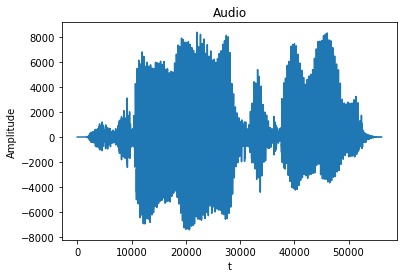

In [10]:
import scipy.io.wavfile as wav
from scipy.io.wavfile import read
from IPython.display import display, Audio

Fs,data=wav.read('sanae.wav')
x = data[:,0]
display(Audio(data=x, rate=Fs))

ficheiro_audio2 = np.array(x, dtype = int)

plt.plot(x)
plt.title("Audio")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

In [11]:
R = 7
m = 0

Vmax = max(x) + 1

Vq,Iq = Quantific(R, Vmax,"midtread")

sinal_quantificado = Quantificador(x,Vq,Iq)

sinal_codificado_3 = Codific(sinal_quantificado,7)

sinal_hamming_codificado = Hamming_7_4(sinal_codificado)

print("SNRp {}".format(Measure_SNRt(R,Vmax,x)))
print("SNRt {}".format(Measure_SNRp(x, sinal_quantificado)))

BERt = 0.33
y = 1 * np.logical_xor( sinal_hamming_codificado, np.random.binomial( 1, BERt, len(sinal_hamming_codificado) ) )
print("Ber_teorico {}".format(BERt))
print("BER_pratico {}".format(BER_pratico(sinal_hamming_codificado,y)))

y_detetor = Detetor(y)
print("Ber_pratico apos correção de erros {}".format(BER_pratico(sinal_codificado_3,y_detetor)))

SNRp 36.7784656212335
SNRt 2.007361949633544
Ber_teorico 0.33
BER_pratico 0.32142857142857145
Ber_pratico apos correção de erros 0.328125


In [12]:
R = 10
m = 0

Vmax = max(x) + 1

Vq,Iq = Quantific(R, Vmax,"midtread")

sinal_quantificado = Quantificador(x,Vq,Iq)


sinal_codificado_3 = Codific(sinal_quantificado,7)

sinal_hamming_codificado = Hamming_7_4(sinal_codificado)

print("SNRp {}".format(Measure_SNRp(x, sinal_quantificado)))
print("SNRt {}".format(Measure_SNRt(R,Vmax,x)))

BERt = 0.85
y = 1 * np.logical_xor( sinal_hamming_codificado, np.random.binomial( 1, BERt, len(sinal_hamming_codificado) ) )
print("Ber_teorico {}".format(BERt))
print("BER_pratico {}".format(BER_pratico(sinal_hamming_codificado,y)))

y_detetor = Detetor(y)
print("Ber_pratico depois da correção de erros {}".format(BER_pratico(sinal_codificado_3,y_detetor)))

SNRp 15.92271168439854
SNRt 54.838465621233496
Ber_teorico 0.85
BER_pratico 0.8422619047619048
Ber_pratico depois da correção de erros 0.859375


In [13]:
R = 10
m = 0

Vmax = max(x) + 1

Vq,Iq = Quantific(R, Vmax,"midtread")

sinal_quantificado = Quantificador(x,Vq,Iq)

sinal_codificado_3 = Codific(sinal_quantificado,7)

sinal_hamming_codificado = Hamming_7_4(sinal_codificado)


print("SNRp {}".format(Measure_SNRp(x, sinal_quantificado)))
print("SNRt {}".format(Measure_SNRt(R,Vmax,x)))

      
BERt = 0.85
y = 1 * np.logical_xor( sinal_hamming_codificado, np.random.binomial( 1, BERt, len(sinal_hamming_codificado) ) )
print("Ber_teorico {}".format(BERt))
print("BER_pratico {}".format(BER_pratico(sinal_hamming_codificado,y)))

y_detetor = Detetor(y)
print("Ber_pratico depois da correção de erros {}".format(BER_pratico(sinal_codificado_3,y_detetor)))

SNRp 15.92271168439854
SNRt 54.838465621233496
Ber_teorico 0.85
BER_pratico 0.8482142857142857
Ber_pratico depois da correção de erros 0.875
